### This is the fillings retreival section

In [5]:
import pickle

from sec_api import ExtractorApi
from sec_api import QueryApi

extractorApi = ExtractorApi("c133b617db2ad658c665845de60bab7bca20b50a66410b727867c555386cb3ab")
queryApi = QueryApi(api_key="c133b617db2ad658c665845de60bab7bca20b50a66410b727867c555386cb3ab")

data_path="C:\\Users\\pekowalc\\Documents\\CUNY-Fall-2022\\DATA 698 Master's Research Project\\code\\data\\"

Define dictionaries for the companies and time periods in our analysis

In [6]:
companies={'Services':['HAL','SLB','NOV','BKR','WFRD','NINE','NEX','SOI','PUMP','RES','LBRT'],
           'Operators':['XOM','CVX','OXY','MRO','HES','SHEL','COP','TTE','EQNR','EOG','MPC'],
           'Control':['KR','GM','INTC','JNJ','JPM','F','M','MSFT','GOOG','AAPL','CMI','CAT','MMM','AXP','BA','KO','HON']}
periods={'P1':['1998-01-01','2008-12-31'],
         'P2':['2009-01-01','2018-12-31'],
         'P3':['2018-01-01','2021-12-31']}
fillings={'Services':{'P1':{},
                  'P2':{},
                  'P3':{}},
            'Operators':{'P1':{},
                  'P2':{},
                  'P3':{}},
            'Control':{'P1':{},
                  'P2':{},
                  'P3':{}}
        }

Define a function to retreive all the 10-K fillings for a specific company in a specific period

In [4]:
def query(ticker,period):
    print(ticker + ": " + period[0] + " to " + period[1])
    query = {
      "query": { "query_string": { 
          "query": "ticker:"+ticker+" AND filedAt:["+period[0]+" TO "+period[1]+"] AND formType:\"10-K\"",
          "time_zone": "America/New_York"
      } },
      "from": "0",
      "size": "10",
      "sort": [{ "filedAt": { "order": "desc" } }]
    }
    return(queryApi.get_filings(query))

Use the fuction to retreive the urls for all the fillings for all companies for all periods. Save the urls to a file.

In [4]:
for group,groupPeriods in fillings.items():
    print(group)
    for groupPeriod in groupPeriods:
        print(groupPeriod)
        for ticker in companies[group]:
            #print(ticker)
            #print(periods[groupPeriod])
            urls={}
            response=query(ticker,periods[groupPeriod])
            for n in range(0,len(response['filings'])):
                if(response['filings'][n]['formType']=='10-K') and ((response['filings'][n]['linkToFilingDetails'][-1]=='m') or (response['filings'][n]['linkToFilingDetails'][-1]=='t')):
                    #print('Saving filling for: '+ticker+'. From the period: '+periods[groupPeriod][0]+' to '+periods[groupPeriod][1])
                    urls.update({response['filings'][n]['filedAt'][0:4]:response['filings'][n]['linkToFilingDetails']})
                    print(response['filings'][n]['filedAt'][0:4]+" ",end=" ")
            fillings[group][groupPeriod][ticker]=urls
            print(" ")

with open(data_path+'results\\filling_urls.pkl', 'wb') as f:
    pickle.dump(fillings, f)

Services
P1
HAL: 1998-01-01 to 2008-12-31
2008  2007  2006  2005  2004  2003   
SLB: 1998-01-01 to 2008-12-31
2008  2007  2006  2005  2004  2003   
NOV: 1998-01-01 to 2008-12-31
2008  2007  2006  2005  2004   
BKR: 1998-01-01 to 2008-12-31
2008  2007  2006  2005  2004  2003   
WFRD: 1998-01-01 to 2008-12-31
 
NINE: 1998-01-01 to 2008-12-31
 
NEX: 1998-01-01 to 2008-12-31
 
SOI: 1998-01-01 to 2008-12-31
 
PUMP: 1998-01-01 to 2008-12-31
2005   
RES: 1998-01-01 to 2008-12-31
2008  2007  2006  2005  2004  2003   
LBRT: 1998-01-01 to 2008-12-31
2005  2004  2002  2000   
P2
HAL: 2009-01-01 to 2018-12-31
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
SLB: 2009-01-01 to 2018-12-31
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
NOV: 2009-01-01 to 2018-12-31
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
BKR: 2009-01-01 to 2018-12-31
2018  2012  2011  2009   
WFRD: 2009-01-01 to 2018-12-31
2018  2017  2016  2015   
NINE: 2009-01-01 to 2018-12-31
2018 

Retrieve all the filling urls saved into a file.     
**Start here is this notebook has already be run before** 

In [3]:
with open(data_path+'\\results\\filling_urls.pkl', 'rb') as f:
    fillings = pickle.load(f)

In [78]:
fillings

{'Services': {'P1': {'HAL': {'2008': 'https://www.sec.gov/Archives/edgar/data/45012/000004501208000122/ed10k2007_final.htm',
    '2007': 'https://www.sec.gov/Archives/edgar/data/45012/000004501207000072/ed10k2006_final.htm',
    '2006': 'https://www.sec.gov/Archives/edgar/data/45012/000004501206000124/ed10k2005_final.htm',
    '2005': 'https://www.sec.gov/Archives/edgar/data/45012/000004501205000055/ed10k2004_final.htm',
    '2004': 'https://www.sec.gov/Archives/edgar/data/45012/000004501204000086/ed10k2003.txt',
    '2003': 'https://www.sec.gov/Archives/edgar/data/45012/000004501203000018/ed10k_2002.txt'},
   'SLB': {'2008': 'https://www.sec.gov/Archives/edgar/data/87347/000119312508029168/d10k.htm',
    '2007': 'https://www.sec.gov/Archives/edgar/data/87347/000119312507033647/d10k.htm',
    '2006': 'https://www.sec.gov/Archives/edgar/data/87347/000119312506037849/d10k.htm',
    '2005': 'https://www.sec.gov/Archives/edgar/data/87347/000119312505041937/d10k.htm',
    '2004': 'https://w

Define a function to retreive a specific section (Item) from the given fillings and store them in a file. Each filling section (item) is stored in an individual text file using the group, period,section, ticker and year in the fine name.

In [4]:
def retrieveSection(section,fillings):
    for group,groupPeriods in fillings.items():
        print(group)
        for groupPeriod in groupPeriods:
            print(groupPeriod)
            for ticker in companies[group]:
                print(ticker)
                #print(periods[groupPeriod])
                for year,url in fillings[group][groupPeriod][ticker].items():
                    print(year+" ",end=" ")
                    #print(url)
                    section_text = extractorApi.get_section(url, str(section), "text")
                    textFileName=data_path+group+"_"+groupPeriod+"_"+"Section"+str(section)+"_"+ticker+year+".txt"
                    text_file = open(textFileName, "w",encoding="utf-8")
                    text_file.write(section_text)
                    text_file.close()
                    #print(textFileName)
                print(" ")

In [61]:
retrieveSection(7,fillings)

Services
P1
HAL
2008  2007  2006  2005  2004  2003   
SLB
2008  2007  2006  2005  2004  2003   
NOV
2008  2007  2006  2005  2004   
BKR
2008  2007  2006  2005  2004  2003   
WFRD
 
NINE
 
NEX
 
SOI
 
PUMP
2005   
RES
2008  2007  2006  2005  2004  2003   
LBRT
2005  2004  2002  2000   
P2
HAL
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
SLB
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
NOV
2018  2017  2016  2015  2014  2013  2012  2011  2010  2009   
BKR
2018  2012  2011  2009   
WFRD
2018  2017  2016  2015   
NINE
2018   
NEX
2018  2017   
SOI
2018   
PUMP
2018   
RES
2018  2017  2016  2015  2014  2013  2012  2011  2010   
LBRT
2018   
P3
HAL
2021  2020  2019  2018   
SLB
2021  2020  2019  2018   
NOV
2021  2020  2019  2018   
BKR
2021  2020  2019  2018   
WFRD
2021  2020  2019  2018   
NINE
2021  2020  2019  2018   
NEX
2021  2020  2019  2018   
SOI
2021  2020  2019  2018   
PUMP
2021  2020  2019  2018   
RES
2021  2020  2019  2018   
LBRT
2021  2020  

## This is the sentiment analysis section

In [14]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential
import os
import pickle
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from numpy import std
import numpy as np

key = "4a678a143e114e24ad9b0f014eb1f390"
endpoint = "https://cunynlp.cognitiveservices.azure.com/"

data_path="C:\\Users\\pekowalc\\Documents\\CUNY-Fall-2022\\DATA 698 Master's Research Project\\code\\data\\"

In [6]:
# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

Define function to filter text files for the defined group, period,section,company

In [15]:
def filterFillings(group,period,section,company):
    fillings_files=os.listdir(data_path)

    regex_group = re.compile(group)
    regex_period = re.compile("_"+period)
    regex_section = re.compile("Section"+section)
    regex_company = re.compile(company)

    filtered_filling_files=[]
    for filling_file in fillings_files:
        match_group=regex_group.search(filling_file)
        match_period=regex_period.search(filling_file)
        match_section=regex_section.search(filling_file)
        match_company=regex_company.search(filling_file)
        if(match_group and match_period and match_section and match_company and filling_file!="results"):
            #print(filling_file)
            filtered_filling_files.append(filling_file)
    
    filtered_filling_files_clean=filtered_filling_files.copy()
    #some fillings might not have the section we are trying to parse, these return files with size 0, here we delete these files
    for filename in filtered_filling_files:
        if filename!="results":
            print(filename+" "+str(os.stat(data_path+filename).st_size))
            if os.stat(data_path+filename).st_size==0:
                print("deleting file: "+filename)
                os.remove(data_path+filename)
                filtered_filling_files_clean.remove(filename)
            
    return(filtered_filling_files_clean)

In [471]:
filtered_fillings=filterFillings("Operators","P3","7","")

Operators_P3_Section7_COP2018.txt 157327
Operators_P3_Section7_COP2019.txt 169279
Operators_P3_Section7_COP2020.txt 163519
Operators_P3_Section7_COP2021.txt 175106
Operators_P3_Section7_CVX2018.txt 298
Operators_P3_Section7_CVX2019.txt 298
Operators_P3_Section7_CVX2020.txt 298
Operators_P3_Section7_CVX2021.txt 297
Operators_P3_Section7_EOG2018.txt 80939
Operators_P3_Section7_EOG2019.txt 76874
Operators_P3_Section7_EOG2020.txt 80680
Operators_P3_Section7_EOG2021.txt 88671
Operators_P3_Section7_HES2018.txt 118315
Operators_P3_Section7_HES2019.txt 108172
Operators_P3_Section7_HES2020.txt 442117
Operators_P3_Section7_HES2021.txt 427598
Operators_P3_Section7_MPC2018.txt 146764
Operators_P3_Section7_MPC2019.txt 138464
Operators_P3_Section7_MPC2020.txt 132172
Operators_P3_Section7_MPC2021.txt 136053
Operators_P3_Section7_MRO2018.txt 100186
Operators_P3_Section7_MRO2019.txt 101588
Operators_P3_Section7_MRO2020.txt 79970
Operators_P3_Section7_MRO2021.txt 79527
Operators_P3_Section7_OXY2018.txt 

A function is defined to run sentiment on all the filtered files contained in the data path folder. The function return a data frame with all the results

In [54]:
def runSentiment(filtered_fillings):
        
    results=[]
    group=[]
    period=[]
    section=[]
    co=[]
    year=[]
    for file in filtered_fillings:
        print(file)
        fileObject = open(data_path+file, "r",encoding='utf8')
        document = fileObject.read()
        documentAsList=[]
        print(len(document))
        maxLen=5120
        if (len(document)<maxLen):
            documentAsList.append(document)
            try:
                results.append(client.analyze_sentiment(documentAsList, show_opinion_mining=False))
                #print(file+'\n')
                group.append(re.findall("(.*?)_P",file)[0])
                period.append(re.findall("_P[0-3]_",file)[0][1:3])
                section.append(re.findall("_Section[0-9]_",file)[0][8])
                co.append(re.findall("Section?[0-9]_(.*?)?[0-9]?[0-9]?[0-9]?[0-9]\.",file)[0])
                year.append(re.findall("Section[0-9]_.*[a-zA-Z](.*?)\.txt",file)[0])
            except:
                print("Could not get sentiment for: ",file)
        else:
            n=int(len(document)/maxLen)
            docSlices=[]
            for i in range(1,n+1):
                document_slice=document[i*maxLen-maxLen:i*maxLen]
                #print([i*maxLen-maxLen,i*maxLen])
                docSlices.append(document_slice)
            document_slice=document[i*maxLen:len(document)]
            #print('Len of document last slice: '+str(len(document_slice)))
            #print([i*maxLen,len(document)])
            docSlices.append(document_slice)
            print('Number of slices: '+str(len(docSlices)))
            for slice in docSlices:
                documentAsList=[]
                #print('Slice len: '+str(len(slice)))
                documentAsList.append(slice)
                try:
                    results.append(client.analyze_sentiment(documentAsList, show_opinion_mining=False))
                    #print(file+'\n')
                    group.append(re.findall("(.*?)_P",file)[0])
                    period.append(re.findall("_P[0-3]_",file)[0][1:3])
                    section.append(re.findall("_Section[0-9]_",file)[0][8])
                    co.append(re.findall("Section?[0-9]_(.*?)?[0-9]?[0-9]?[0-9]?[0-9]\.",file)[0])
                    year.append(re.findall("Section[0-9]_.*[a-zA-Z](.*?)\.txt",file)[0])
                except:
                    print("Could not get sentiment for: ",file)
    df_results=pd.DataFrame()
    rows=[]
    for result in results:
        try:
            rows.append({'Positive':result[0].confidence_scores.positive,
                 'Negative':result[0].confidence_scores.negative,
                 'Neutral':result[0].confidence_scores.neutral})
        except:
            rows.append({'Positive':np.NaN,
                 'Negative':np.NaN,
                 'Neutral':np.NaN})
    df_results = pd.concat([df_results, pd.DataFrame(rows)], axis=0, ignore_index=True)
    df_results['Group']=group
    df_results['Period']=period
    df_results['Section']=section
    df_results['Co']=co
    df_results['Year']=year
    return(df_results)

In [472]:
df_results=runSentiment(filtered_fillings)
df_results=df_results.dropna()
df_results

Operators_P3_Section7_COP2018.txt
156117
Number of slices: 31
Operators_P3_Section7_COP2019.txt
167671
Number of slices: 33
Operators_P3_Section7_COP2020.txt
154419
Number of slices: 31
Operators_P3_Section7_COP2021.txt
165496
Number of slices: 33
Operators_P3_Section7_CVX2018.txt
294
Operators_P3_Section7_CVX2019.txt
294
Operators_P3_Section7_CVX2020.txt
294
Operators_P3_Section7_CVX2021.txt
293
Operators_P3_Section7_EOG2018.txt
78851
Number of slices: 16
Operators_P3_Section7_EOG2019.txt
74934
Number of slices: 15
Operators_P3_Section7_EOG2020.txt
78634
Number of slices: 16
Operators_P3_Section7_EOG2021.txt
88161
Number of slices: 18
Operators_P3_Section7_HES2018.txt
110767
Number of slices: 22
Operators_P3_Section7_HES2019.txt
101066
Number of slices: 20
Operators_P3_Section7_HES2020.txt
401939
Number of slices: 79
Operators_P3_Section7_HES2021.txt
424898
Number of slices: 83
Operators_P3_Section7_MPC2018.txt
142934
Number of slices: 28
Operators_P3_Section7_MPC2019.txt
134394
Numbe

,Positive,Negative,Neutral,Group,Period,Section,Co,Year
0,0.22,0.63,0.15,Operators,P3,7,COP,2018
1,0.54,0.16,0.31,Operators,P3,7,COP,2018
2,0.20,0.63,0.17,Operators,P3,7,COP,2018
3,0.17,0.69,0.14,Operators,P3,7,COP,2018
4,0.10,0.77,0.13,Operators,P3,7,COP,2018
...,...,...,...,...,...,...,...,...
687,0.00,1.00,0.00,Operators,P3,7,OXY,2021
688,0.00,0.00,1.00,Operators,P3,7,XOM,2018
689,0.00,0.00,1.00,Operators,P3,7,XOM,2019
690,0.00,0.00,1.00,Operators,P3,7,XOM,2020


In [473]:
isExist = os.path.exists(data_path+"results\\df_results.csv")
print(isExist)
if (os.path.exists(data_path+"results\\df_results.csv")):
    df_results.to_csv(data_path+"results\\df_results.csv",index=False,mode='a',header=False)
else:
    df_results.to_csv(data_path+"results\\df_results.csv",index=False)
df_results=pd.read_csv(data_path+"results\\df_results.csv")
df_results

True


,Positive,Negative,Neutral,Group,Period,Section,Co,Year
0,0.02,0.00,0.98,Services,P3,1,HAL,2018
1,0.47,0.40,0.13,Services,P3,1,HAL,2018
2,0.18,0.59,0.23,Services,P3,1,HAL,2018
3,0.29,0.57,0.14,Services,P3,1,HAL,2018
4,0.14,0.57,0.29,Services,P3,1,HAL,2018
...,...,...,...,...,...,...,...,...
16330,0.00,1.00,0.00,Operators,P3,7,OXY,2021
16331,0.00,0.00,1.00,Operators,P3,7,XOM,2018
16332,0.00,0.00,1.00,Operators,P3,7,XOM,2019
16333,0.00,0.00,1.00,Operators,P3,7,XOM,2020


In [145]:
df_results_unindex=df_results.copy()
df_results_unindex.reset_index(inplace=True)
df_results_unindex=df_results_unindex[df_results_unindex.Group=='Control']
df_results_unindex=df_results_unindex[df_results_unindex.Section==7]
df_results_unindex.pop("Group")
df_results_unindex.pop("Period")
df_results_unindex.pop("Section")
df_results_unindex.pop("Co")
df_results_unindex.pop("index")
dfm = df_results_unindex.melt('Year', var_name='cols', value_name='vals')
dfm

,Year,cols,vals
0,2018,Positive,0.00
1,2018,Positive,0.56
2,2018,Positive,0.49
3,2018,Positive,0.57
4,2018,Positive,0.87
...,...,...,...
17569,2008,Neutral,0.16
17570,2008,Neutral,0.27
17571,2008,Neutral,0.13
17572,2008,Neutral,0.06


In [146]:
dfm=dfm.groupby(['Year','cols']).mean()
dfm

vals
Year cols              
2000 Negative  0.739375
     Neutral   0.233125
     Positive  0.026875
2001 Negative  0.600000
     Neutral   0.278667
...                 ...
2020 Neutral   0.213466
     Positive  0.243282
2021 Negative  0.608912
     Neutral   0.213930
     Positive  0.176632

[66 rows x 1 columns]

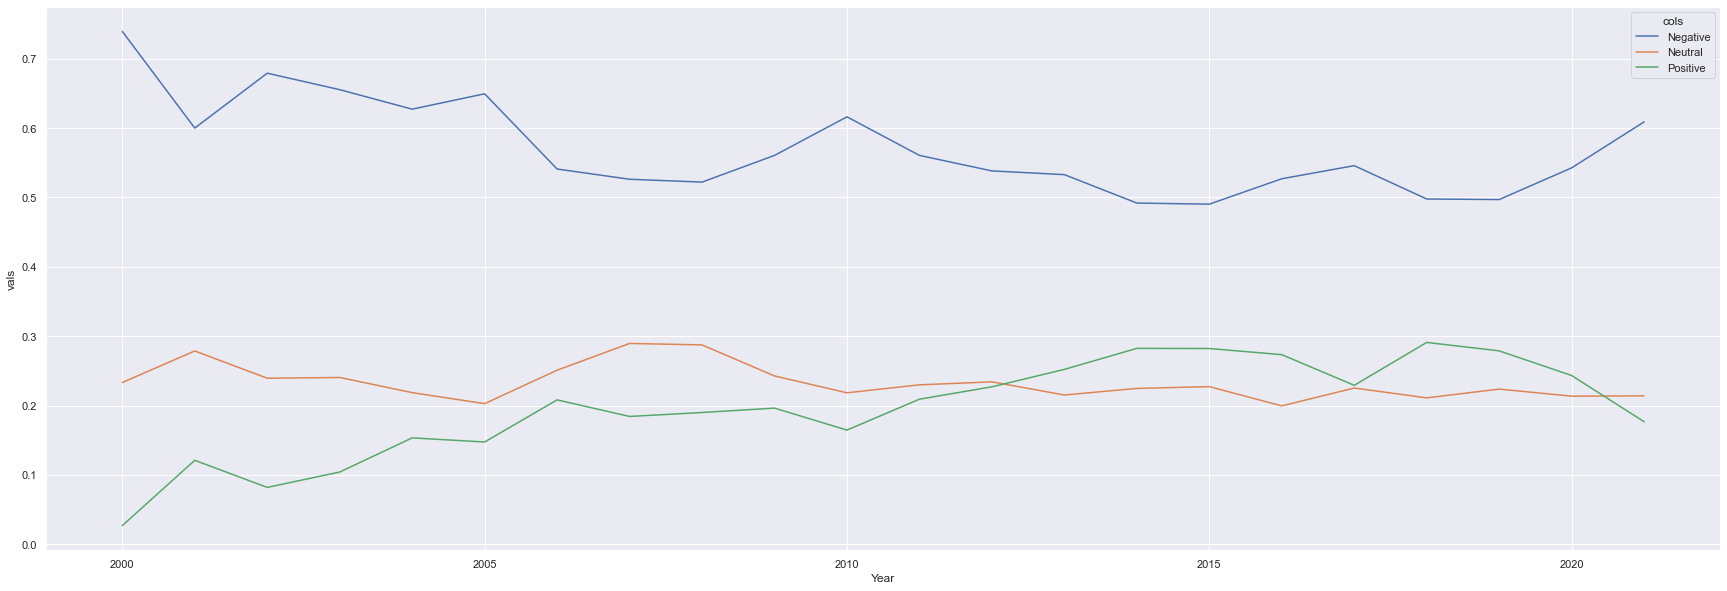

In [147]:
sns.set(rc={"figure.figsize":(30, 10)})
graph=sns.lineplot(x="Year", y="vals", hue='cols', data=dfm, estimator=median, ci=95)
plt.show()

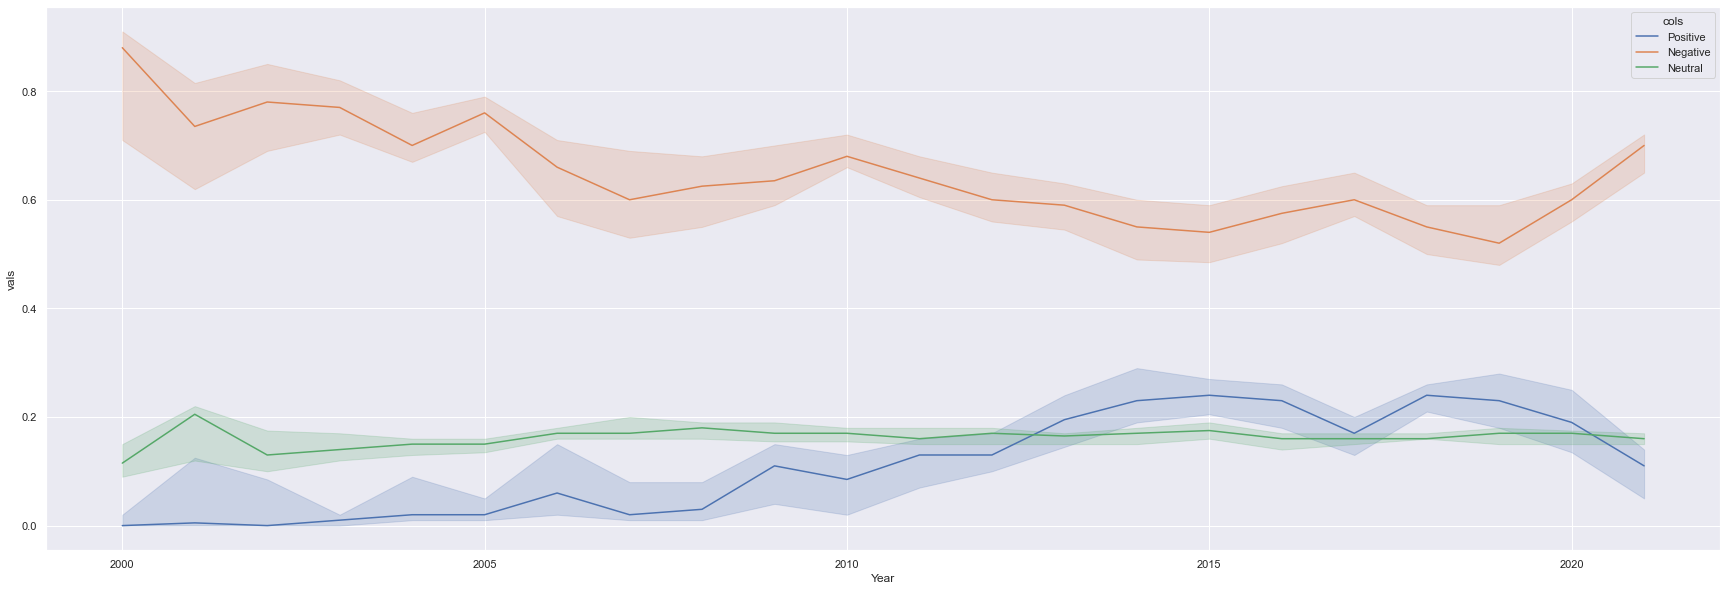

In [127]:
df_results_unindex=df_results.copy()
df_results_unindex.reset_index(inplace=True)
df_results_unindex=df_results_unindex[df_results_unindex.Group=='Control']
df_results_unindex=df_results_unindex[df_results_unindex.Section==7]
df_results_unindex.pop("Group")
df_results_unindex.pop("Period")
df_results_unindex.pop("Section")
df_results_unindex.pop("Co")
df_results_unindex.pop("index")
dfm = df_results_unindex.melt('Year', var_name='cols', value_name='vals')

sns.set(rc={"figure.figsize":(30, 10)})
graph=sns.lineplot(x="Year", y="vals", hue='cols', data=dfm, estimator=median, ci=95)
plt.show()

## Get Oil Prices and merge on to reults data frame

In [474]:
df_wti=pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RWTCd.xls",sheet_name="Data 1",skiprows=2801, names=['Date','WTI'])
df_brent=pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls",sheet_name="Data 1",skiprows=2455, names=['Date','BRENT'])
df_oil=pd.DataFrame()
df_oil['Date']=df_wti['Date']
df_oil['WTI']=df_wti['WTI']
df_oil['BRENT']=df_brent['BRENT']

df_oil

,Date,WTI,BRENT
0,1997-01-07,26.25,24.76
1,1997-01-08,26.55,24.78
2,1997-01-09,26.30,24.83
3,1997-01-10,26.15,24.22
4,1997-01-13,25.20,23.41
...,...,...,...
6477,2022-10-25,86.93,108.23
6478,2022-10-26,89.39,107.32
6479,2022-10-27,89.06,109.64
6480,2022-10-28,87.85,109.68


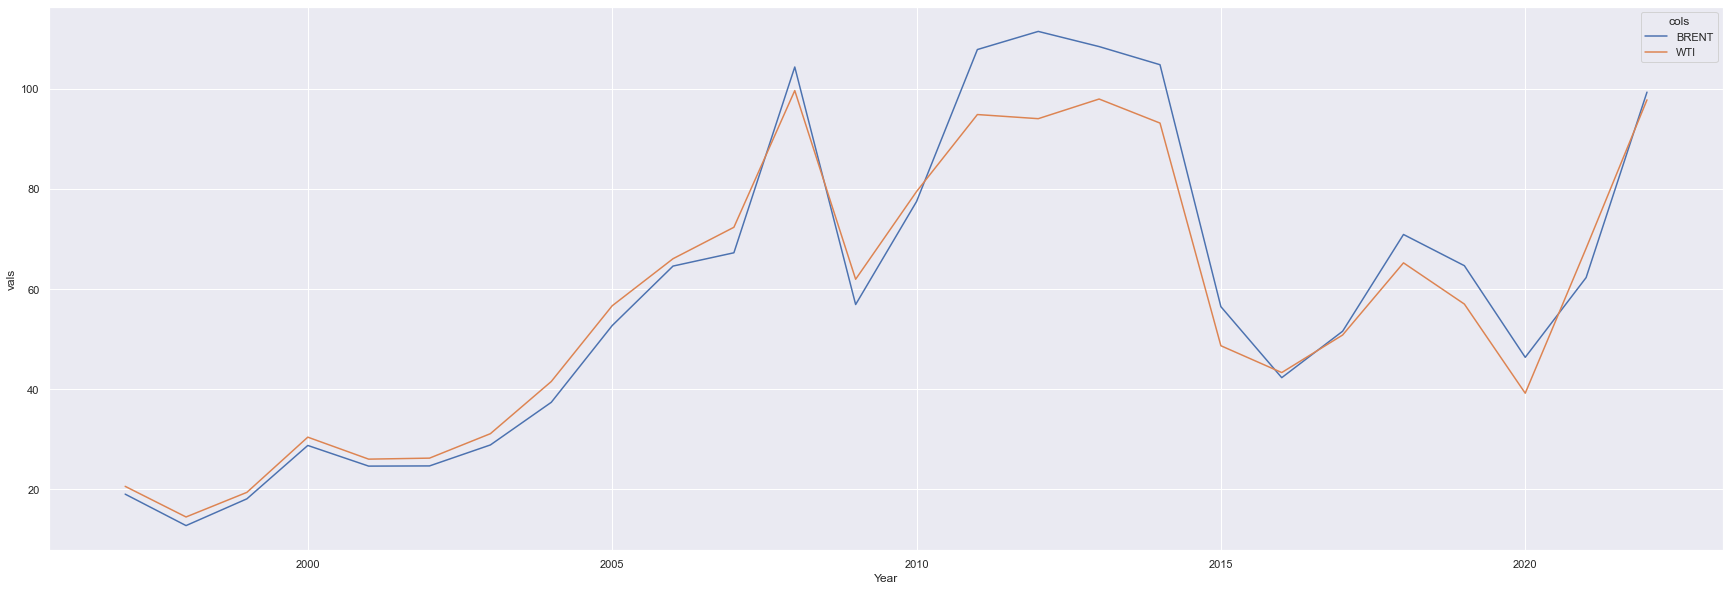

In [475]:
dfm = df_oil.melt('Date', var_name='cols', value_name='vals')
dfm['Date']=pd.to_datetime(dfm['Date'])
dfm['Year']=dfm['Date'].dt.year
dfm=dfm.groupby(['Year','cols']).mean()

sns.set(rc={"figure.figsize":(30, 10)})
graph=sns.lineplot(x="Year", y="vals", hue='cols', data=dfm, estimator=median, ci=95)
plt.show()

In [476]:
dfm=dfm.unstack()
dfm

vals           
cols       BRENT        WTI
Year                       
1997   18.985462  20.545904
1998   12.697888  14.422072
1999   18.051076  19.344980
2000   28.720040  30.378520
2001   24.589800  25.983120
2002   24.627720  26.184960
2003   28.821680  31.075240
2004   37.345944  41.506024
2005   52.681355  56.637251
2006   64.583454  66.054659
2007   67.242222  72.340595
2008  104.386047  99.671502
2009   56.896349  61.950437
2010   77.474087  79.475714
2011  107.875397  94.880873
2012  111.501190  94.053333
2013  108.467976  97.982540
2014  104.842341  93.172222
2015   56.470437  48.656706
2016   42.274008  43.293651
2017   51.554320  50.800320
2018   70.900120  65.227470
2019   64.661000  56.988320
2020   46.338571  39.160437
2021   62.281235  68.135100
2022   99.357895  97.816555

In [242]:
dfm.to_csv(data_path+"results\\oil_prices.csv",index=True,header=True)

In [477]:
df_oil_year=pd.read_csv(data_path+"results\\oil_prices.csv")
df_oil_year['Year']=pd.to_datetime(df_oil_year['Year'].apply(str))
df_oil_year

,Year,BRENT,WTI
0,1997-01-01,18.985462,20.545904
1,1998-01-01,12.697888,14.422072
2,1999-01-01,18.051076,19.344980
3,2000-01-01,28.720040,30.378520
4,2001-01-01,24.589800,25.983120
5,2002-01-01,24.627720,26.184960
6,2003-01-01,28.821680,31.075240
7,2004-01-01,37.345944,41.506024
8,2005-01-01,52.681355,56.637251
9,2006-01-01,64.583454,66.054659


In [478]:
df_results=pd.read_csv(data_path+"results\\df_results.csv")
df_results['Year']=pd.to_datetime(df_results['Year'].apply(str))
df_results

,Positive,Negative,Neutral,Group,Period,Section,Co,Year
0,0.02,0.00,0.98,Services,P3,1,HAL,2018-01-01
1,0.47,0.40,0.13,Services,P3,1,HAL,2018-01-01
2,0.18,0.59,0.23,Services,P3,1,HAL,2018-01-01
3,0.29,0.57,0.14,Services,P3,1,HAL,2018-01-01
4,0.14,0.57,0.29,Services,P3,1,HAL,2018-01-01
...,...,...,...,...,...,...,...,...
16330,0.00,1.00,0.00,Operators,P3,7,OXY,2021-01-01
16331,0.00,0.00,1.00,Operators,P3,7,XOM,2018-01-01
16332,0.00,0.00,1.00,Operators,P3,7,XOM,2019-01-01
16333,0.00,0.00,1.00,Operators,P3,7,XOM,2020-01-01


In [1150]:
data=pd.merge(df_results,df_oil_year)
data

,Positive,Negative,Neutral,Group,Period,Section,Co,Year,BRENT,WTI
0,0.02,0.00,0.98,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
1,0.47,0.40,0.13,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
2,0.18,0.59,0.23,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
3,0.29,0.57,0.14,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
4,0.14,0.57,0.29,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
...,...,...,...,...,...,...,...,...,...,...
16111,0.10,0.78,0.12,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16112,0.11,0.77,0.12,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16113,0.00,0.80,0.19,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16114,0.12,0.66,0.22,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496


In [1151]:
data.to_csv(data_path+"results\\results_sentiment_oil.csv",index=False,header=True)
data=pd.read_csv(data_path+"results\\results_sentiment_oil.csv")
data=data[data.Neutral != 1]
data.describe()

,Positive,Negative,Neutral,Section,BRENT,WTI
count,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000
mean,0.204542,0.526279,0.268565,4.718168,68.830852,65.236637
std,0.258258,0.341208,0.284957,2.912861,25.273867,21.348289
min,0.000000,0.000000,0.000000,1.000000,24.589800,25.983120
25%,0.000000,0.197500,0.100000,1.000000,51.554320,48.656706
50%,0.080000,0.620000,0.170000,7.000000,64.661000,65.227470
75%,0.340000,0.820000,0.270000,7.000000,77.474087,79.475714
max,1.000000,1.000000,0.990000,7.000000,111.501191,99.671502


# Data Science starts here

In [3]:
import random
import scipy.stats as st
import pandas as pd

In [23]:
df_oil_year=pd.read_csv(data_path+"results\\oil_prices.csv")
df_oil_year['Year']=pd.to_datetime(df_oil_year['Year'].apply(str))
df_oil_year.head(10)

,Year,BRENT,WTI
0,1997-01-01,18.985462,20.545904
1,1998-01-01,12.697888,14.422072
2,1999-01-01,18.051076,19.344980
3,2000-01-01,28.720040,30.378520
4,2001-01-01,24.589800,25.983120
5,2002-01-01,24.627720,26.184960
6,2003-01-01,28.821680,31.075240
7,2004-01-01,37.345944,41.506024
8,2005-01-01,52.681355,56.637251
9,2006-01-01,64.583454,66.054659


In [9]:
data=pd.read_csv(data_path+"results\\results_sentiment_oil.csv")

#data=data[data.Neutral = 7]
#data=data[data.Group=='Operators']
#data=data[data.Section==7]
#data_unindex=data_unindex[data_unindex.Period=='P3']

data#.describe()

,Positive,Negative,Neutral,Group,Period,Section,Co,Year,BRENT,WTI
0,0.02,0.00,0.98,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
1,0.47,0.40,0.13,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
2,0.18,0.59,0.23,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
3,0.29,0.57,0.14,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
4,0.14,0.57,0.29,Services,P3,1,HAL,2018-01-01,70.90012,65.22747
...,...,...,...,...,...,...,...,...,...,...
16111,0.10,0.78,0.12,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16112,0.11,0.77,0.12,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16113,0.00,0.80,0.19,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496
16114,0.12,0.66,0.22,Operators,P1,7,OXY,2002-01-01,24.62772,26.18496


In [10]:
data_unindex=data.copy()
data_unindex.reset_index(inplace=True)
data_unindex.pop("Group")
data_unindex.pop("Period")
data_unindex.pop("Section")
data_unindex.pop("Co")
data_unindex.pop("index")
dfm = data_unindex.melt('Year', var_name='cols', value_name='vals')
dfm

,Year,cols,vals
0,2018-01-01,Positive,0.02000
1,2018-01-01,Positive,0.47000
2,2018-01-01,Positive,0.18000
3,2018-01-01,Positive,0.29000
4,2018-01-01,Positive,0.14000
...,...,...,...
80575,2002-01-01,WTI,26.18496
80576,2002-01-01,WTI,26.18496
80577,2002-01-01,WTI,26.18496
80578,2002-01-01,WTI,26.18496


In [11]:
dfm_sentiment=dfm.copy()
dfm_sentiment.drop(dfm_sentiment[dfm_sentiment['cols']=='WTI'].index,inplace=True)
dfm_sentiment.drop(dfm_sentiment[dfm_sentiment['cols']=='BRENT'].index,inplace=True)
#dfm_sentiment.drop(dfm_sentiment[dfm_sentiment['cols']=='Negative'].index,inplace=True)
#dfm_sentiment.drop(dfm_sentiment[dfm_sentiment['cols']=='Neutral'].index,inplace=True)
dfm_sentiment['Year']=dfm_sentiment['Year'].str.slice(0, 4).astype(int)

#dfm_sentiment.head(10)

In [12]:
dfm_oil=dfm.copy()
dfm_oil.drop(dfm_oil[dfm_oil['cols']=='Positive'].index,inplace=True)
dfm_oil.drop(dfm_oil[dfm_oil['cols']=='Negative'].index,inplace=True)
dfm_oil.drop(dfm_oil[dfm_oil['cols']=='Neutral'].index,inplace=True)
#dfm_oil.drop(dfm_oil[dfm_oil['cols']=='BRENT'].index,inplace=True)
dfm_oil=dfm_oil.drop_duplicates(keep='first')
dfm_oil['Year']=dfm_oil['Year'].str.slice(0, 4).astype(int)
dfm_oil=dfm_oil.sort_values(by='Year')
dfm_oil=dfm_oil.reset_index(drop=True)

#dfm_oil.head(10)

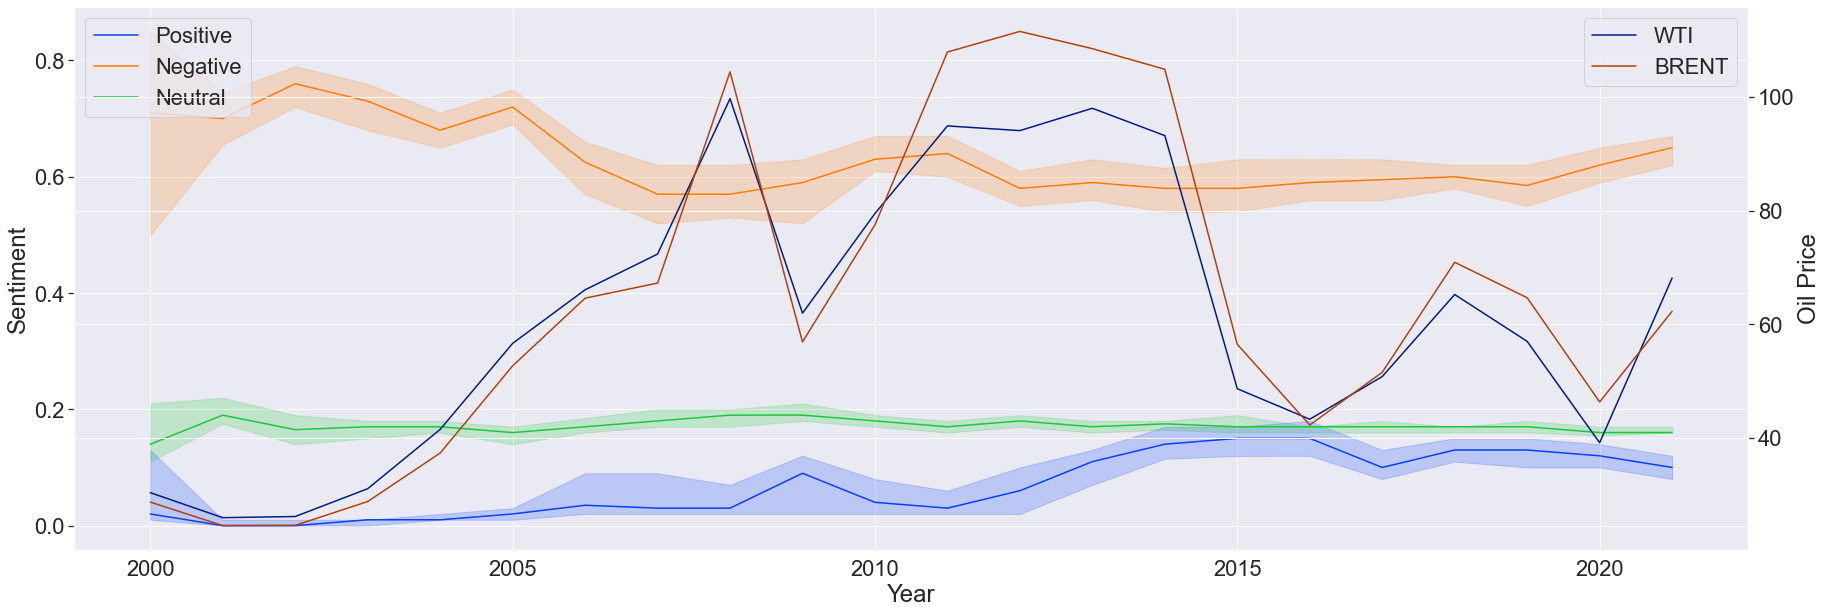

In [15]:
sns.set(rc={"figure.figsize":(30, 10)})
sns.set(font_scale=2)
sns.set_palette("bright")
graph=sns.lineplot(x="Year", y="vals", hue='cols', data=dfm_sentiment, estimator=median, ci=95)
plt.legend(loc='upper left')
graph.set(ylabel='Sentiment')
ax2 = plt.twinx()
sns.set_palette("dark")
graph=sns.lineplot(x="Year", y="vals", hue='cols', data=dfm_oil, estimator=median, ci=95)
plt.legend(loc='upper right',title='')
graph.set(ylabel='Oil Price')
#graph.set_title('Entire Dataset Plot')
plt.show()

In [16]:
working_data=data.copy()
working_data['Year']=working_data['Year'].str.slice(0, 4)

working_data.describe()

,Positive,Negative,Neutral,Section,BRENT,WTI
count,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000,16116.000000
mean,0.204542,0.526279,0.268565,4.718168,68.830852,65.236637
std,0.258258,0.341208,0.284957,2.912861,25.273867,21.348289
min,0.000000,0.000000,0.000000,1.000000,24.589800,25.983120
25%,0.000000,0.197500,0.100000,1.000000,51.554320,48.656706
50%,0.080000,0.620000,0.170000,7.000000,64.661000,65.227470
75%,0.340000,0.820000,0.270000,7.000000,77.474087,79.475714
max,1.000000,1.000000,0.990000,7.000000,111.501191,99.671502


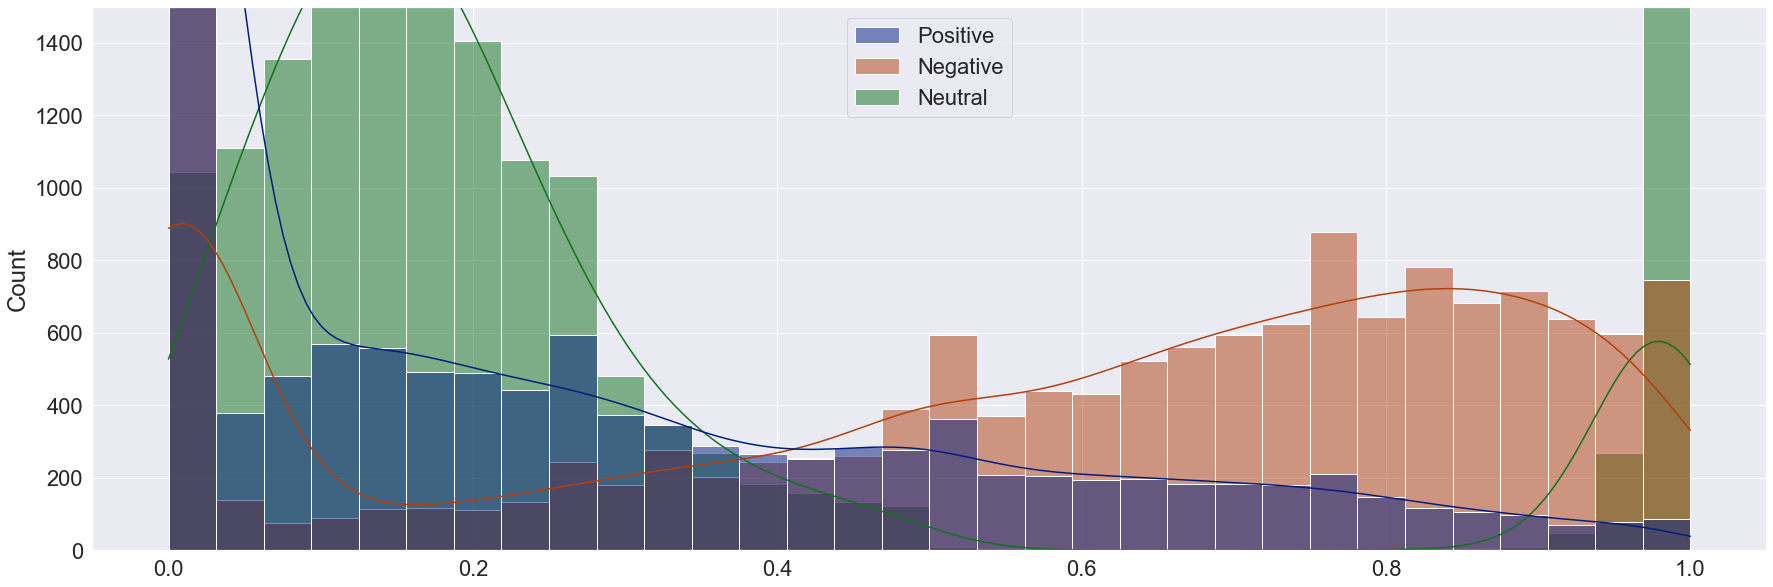

In [17]:
graph=sns.histplot(data=[working_data['Positive'],working_data['Negative'],working_data['Neutral']],kde=True)
plt.ylim(0, 1500)
plt.show()

In [18]:
def bootstrap(data):
    print(min([50,len(data.tolist())]))
    sample_mean = []
    data_dist = []
    for j in range(500):
        for i in range(50):
          y = random.sample(data.tolist(), min([50,len(data.tolist())]) )
          avg = np.mean(y)
          sample_mean.append(avg)
        data_dist.append(np.mean(sample_mean))
    return(data_dist)

In [19]:
working_data=data.copy()
working_data['Year']=working_data['Year'].str.slice(0, 4)

years=pd.DataFrame()
years['years']=working_data['Year']
years=years.drop_duplicates(keep='first')
years=years['years'].tolist()

working_data.drop(working_data[working_data['Neutral']==1].index,inplace=True)

bootstrap_sentiment_positive={}
bootstrap_sentiment_negative={}
bootstrap_sentiment_neutral={}
for year in years:
    print("Bootstrapping "+year)
    thisWorking_data=working_data.copy()
    thisWorking_data.drop(working_data[working_data['Year']!=year].index,inplace=True)
    print("Positive")
    bootstrap_sentiment_positive[year]=np.mean(bootstrap(thisWorking_data['Positive']))
    print("Bootstrap: "+str(bootstrap_sentiment_positive[year]))
    print("Negative")
    bootstrap_sentiment_negative[year]=np.mean(bootstrap(thisWorking_data['Negative']))
    print("Bootstrap: "+str(bootstrap_sentiment_negative[year]))
    print("Neutral")
    bootstrap_sentiment_neutral[year]=np.mean(bootstrap(thisWorking_data['Neutral']))
    print("Bootstrap: "+str(bootstrap_sentiment_neutral[year]))
bootstrap_sentiment_positive=pd.DataFrame(bootstrap_sentiment_positive.items())
bootstrap_sentiment_negative=pd.DataFrame(bootstrap_sentiment_negative.items())
bootstrap_sentiment_neutral=pd.DataFrame(bootstrap_sentiment_neutral.items())
print("Done!")

Bootstrapping 2018
Positive
50
Bootstrap: 0.23027466101322563
Negative
50
Bootstrap: 0.5184908838479916
Neutral
50
Bootstrap: 0.25098695346468497
Bootstrapping 2019
Positive
50
Bootstrap: 0.23060767448151206
Negative
50
Bootstrap: 0.5140070481255771
Neutral
50
Bootstrap: 0.2535036917189646
Bootstrapping 2020
Positive
50
Bootstrap: 0.21446573749012007
Negative
50
Bootstrap: 0.5438835917723776
Neutral
50
Bootstrap: 0.24100320805617992
Bootstrapping 2021
Positive
50
Bootstrap: 0.1937102343895972
Negative
50
Bootstrap: 0.5593733932007767
Neutral
50
Bootstrap: 0.24665021475576157
Bootstrapping 2009
Positive
50
Bootstrap: 0.21358575982927458
Negative
50
Bootstrap: 0.4897602757490547
Neutral
50
Bootstrap: 0.29668948040693066
Bootstrapping 2011
Positive
50
Bootstrap: 0.18834759022430125
Negative
50
Bootstrap: 0.5314477155635458
Neutral
50
Bootstrap: 0.2801891257097708
Bootstrapping 2012
Positive
50
Bootstrap: 0.20366370370272494
Negative
50
Bootstrap: 0.5030534797424885
Neutral
50
Bootstrap: 0

In [20]:
bootstrap_sentiment_positive=bootstrap_sentiment_positive.rename(columns={0:'Year',1:'Positive'})
bootstrap_sentiment_negative=bootstrap_sentiment_negative.rename(columns={0:'Year',1:'Negative'})
bootstrap_sentiment_neutral=bootstrap_sentiment_neutral.rename(columns={0:'Year',1:'Neutral'})
bootstrap_sentiments=pd.concat([bootstrap_sentiment_positive.set_index('Year').sort_index(),bootstrap_sentiment_negative.set_index('Year').sort_index(),bootstrap_sentiment_neutral.set_index('Year').sort_index()],axis=1)
bootstrap_sentiments.reset_index(inplace=True)

In [24]:
oil_year=pd.DataFrame()
oil_year['Year']=df_oil_year['Year'].astype(str).str.slice(0, 4)
oil_year['WTI']=df_oil_year['WTI']
oil_year['BRENT']=df_oil_year['BRENT']
oil_year.head(10)

,Year,WTI,BRENT
0,1997,20.545904,18.985462
1,1998,14.422072,12.697888
2,1999,19.344980,18.051076
3,2000,30.378520,28.720040
4,2001,25.983120,24.589800
5,2002,26.184960,24.627720
6,2003,31.075240,28.821680
7,2004,41.506024,37.345944
8,2005,56.637251,52.681355
9,2006,66.054659,64.583454


In [25]:
sentiment_oil_year=pd.merge(bootstrap_sentiments,oil_year)
sentiment_oil_year.to_csv(data_path+"results\\sentiment_oil_year.csv",index=False,header=True)
sentiment_oil_year.head(10)

,Year,Positive,Negative,Neutral,WTI,BRENT
0,2000,0.182094,0.551115,0.265797,30.378520,28.720040
1,2001,0.102228,0.552753,0.343311,25.983120,24.589800
2,2002,0.087178,0.611259,0.300594,26.184960,24.627720
3,2003,0.116886,0.610622,0.271717,31.075240,28.821680
4,2004,0.158022,0.560173,0.280179,41.506024,37.345944
5,2005,0.167439,0.584096,0.247230,56.637251,52.681355
6,2006,0.207480,0.512356,0.279343,66.054659,64.583454
7,2007,0.204690,0.490928,0.304830,72.340595,67.242222
8,2008,0.205400,0.491422,0.302491,99.671502,104.386047
9,2009,0.213586,0.489760,0.296689,61.950437,56.896349


In [26]:
sentiment_oil_year['Positive'].corr(sentiment_oil_year['BRENT'])

0.5342459390936284

In [27]:
dfm = sentiment_oil_year.melt('WTI', var_name='cols', value_name='vals')
dfm.drop(dfm[dfm['cols']=='BRENT'].index,inplace=True)
dfm.drop(dfm[dfm['cols']=='Year'].index,inplace=True)
dfm.drop(dfm[dfm['cols']=='Neutral'].index,inplace=True)
dfm.head(10)

,WTI,cols,vals
22,30.378520,Positive,0.182094
23,25.983120,Positive,0.102228
24,26.184960,Positive,0.087178
25,31.075240,Positive,0.116886
26,41.506024,Positive,0.158022
27,56.637251,Positive,0.167439
28,66.054659,Positive,0.20748
29,72.340595,Positive,0.20469
30,99.671502,Positive,0.2054
31,61.950437,Positive,0.213586


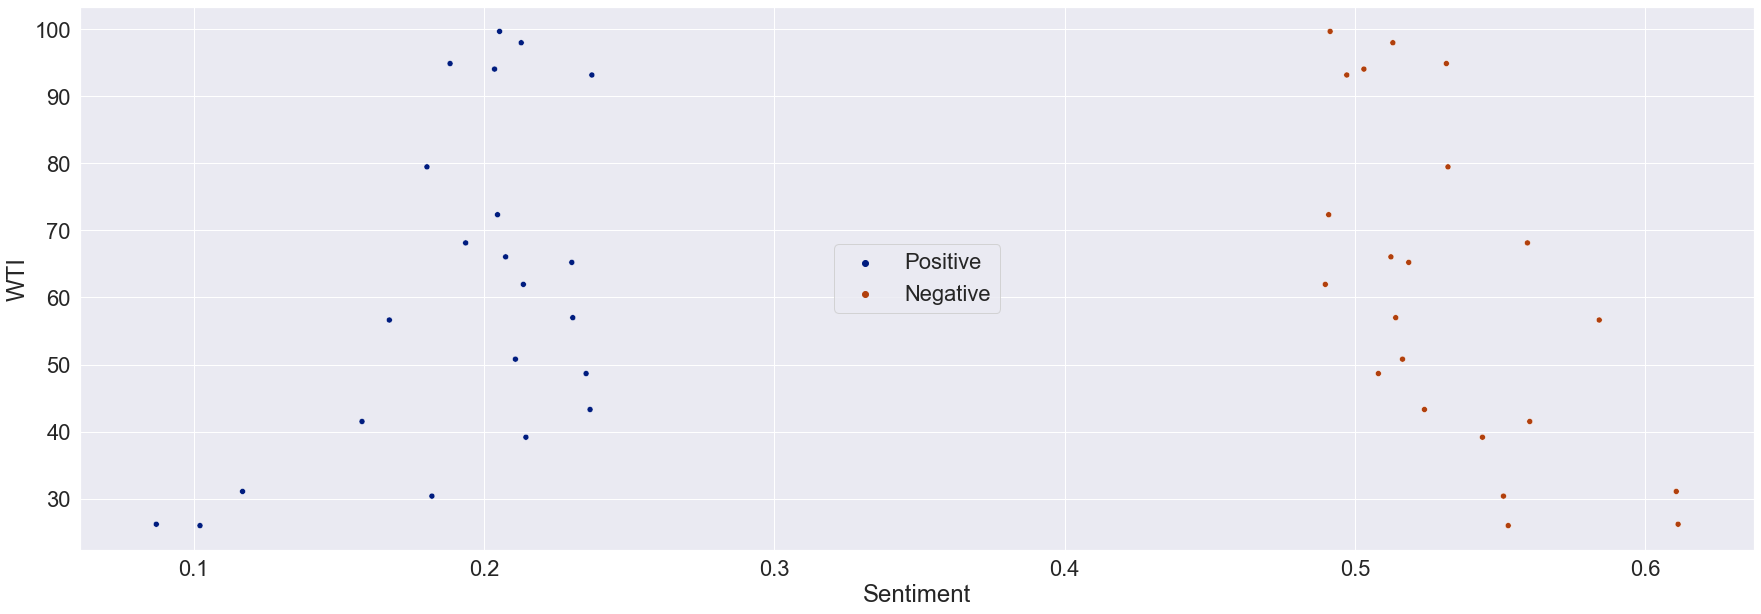

In [28]:
graph=sns.scatterplot(x='vals',y='WTI',hue='cols',data=dfm)
graph.set(xlabel='Sentiment')
plt.legend(loc='center',title='')
plt.show()

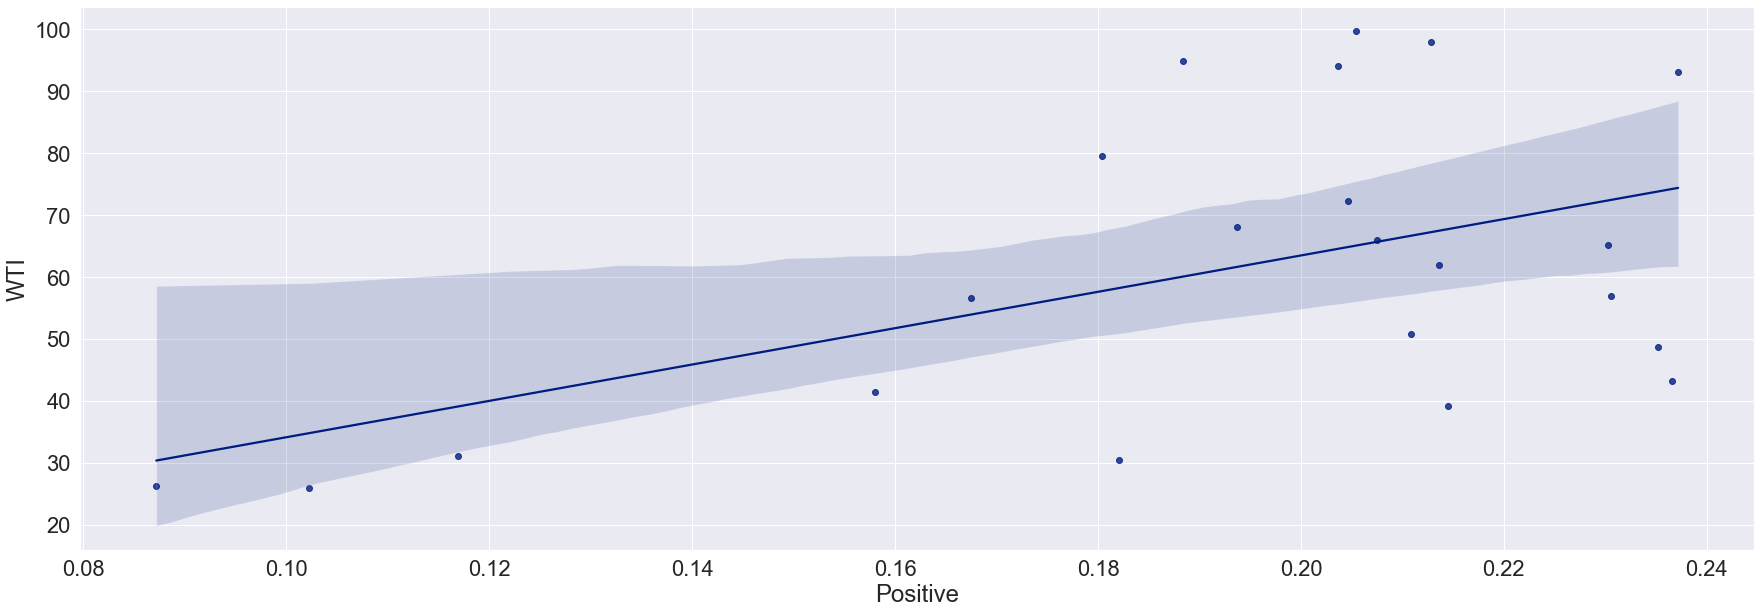

In [29]:
graph=sns.regplot(x='Positive',y='WTI',data=sentiment_oil_year)
plt.show()

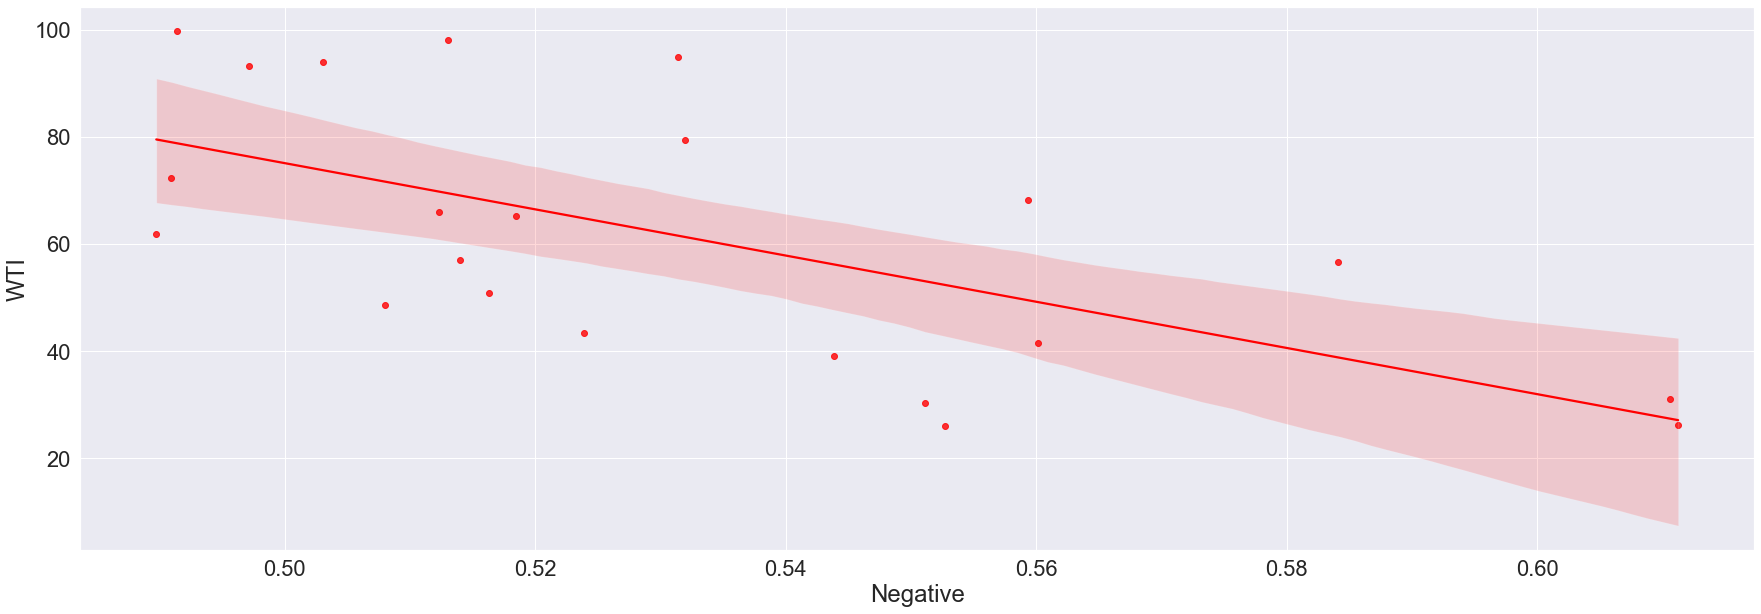

In [30]:
graph=sns.regplot(x='Negative',y='WTI',data=sentiment_oil_year,color="red")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
r2=[]
mse=[]
ytrain=[]
ypred=[]
for i in range(0,5000):
    X_train, X_test, y_train, y_test = train_test_split(sentiment_oil_year[['Positive','Negative']], sentiment_oil_year['WTI'], shuffle=True, train_size=0.3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    r2.append(r2_score(y_train, predictions))
    mse.append(mean_squared_error(y_train, predictions))
    ytrain.extend(y_train)
    ypred.extend(predictions)

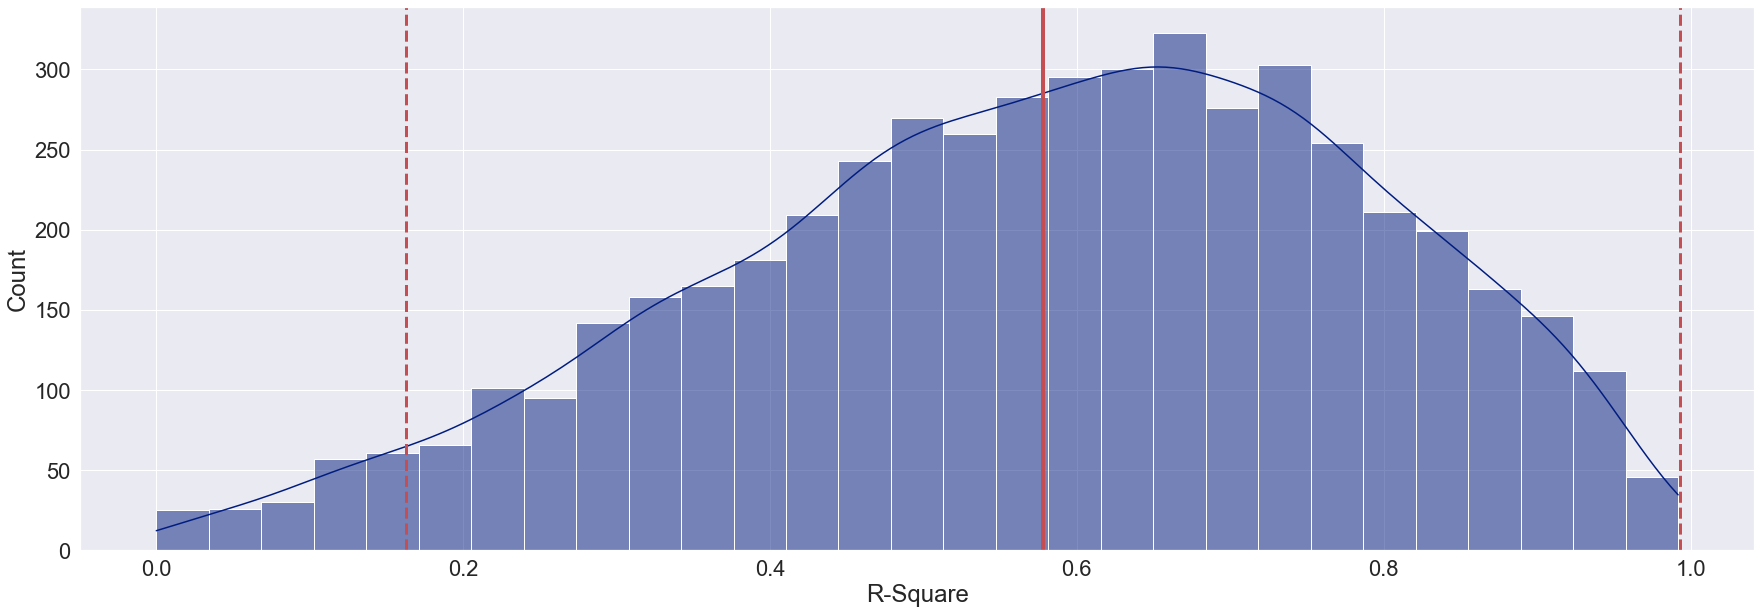

In [57]:
confidence_int_r2=st.t.interval(confidence=0.95, df=len(r2)-1, loc=np.mean(r2), scale=np.std(r2))
mean_r2=np.mean(r2)
confidence_int_mse=st.t.interval(confidence=0.95, df=len(mse)-1, loc=np.mean(mse), scale=np.std(mse))
mean_mse=np.mean(mse)

graph=sns.histplot(data=r2,kde=True)
plt.axvline(confidence_int_r2[0], color='r', linestyle='dashed', linewidth=3)
plt.axvline(confidence_int_r2[1], color='r', linestyle='dashed', linewidth=3)
plt.axvline(mean_r2, color='r', linestyle='solid', linewidth=4)
graph.set(xlabel='R-Square')
plt.show()

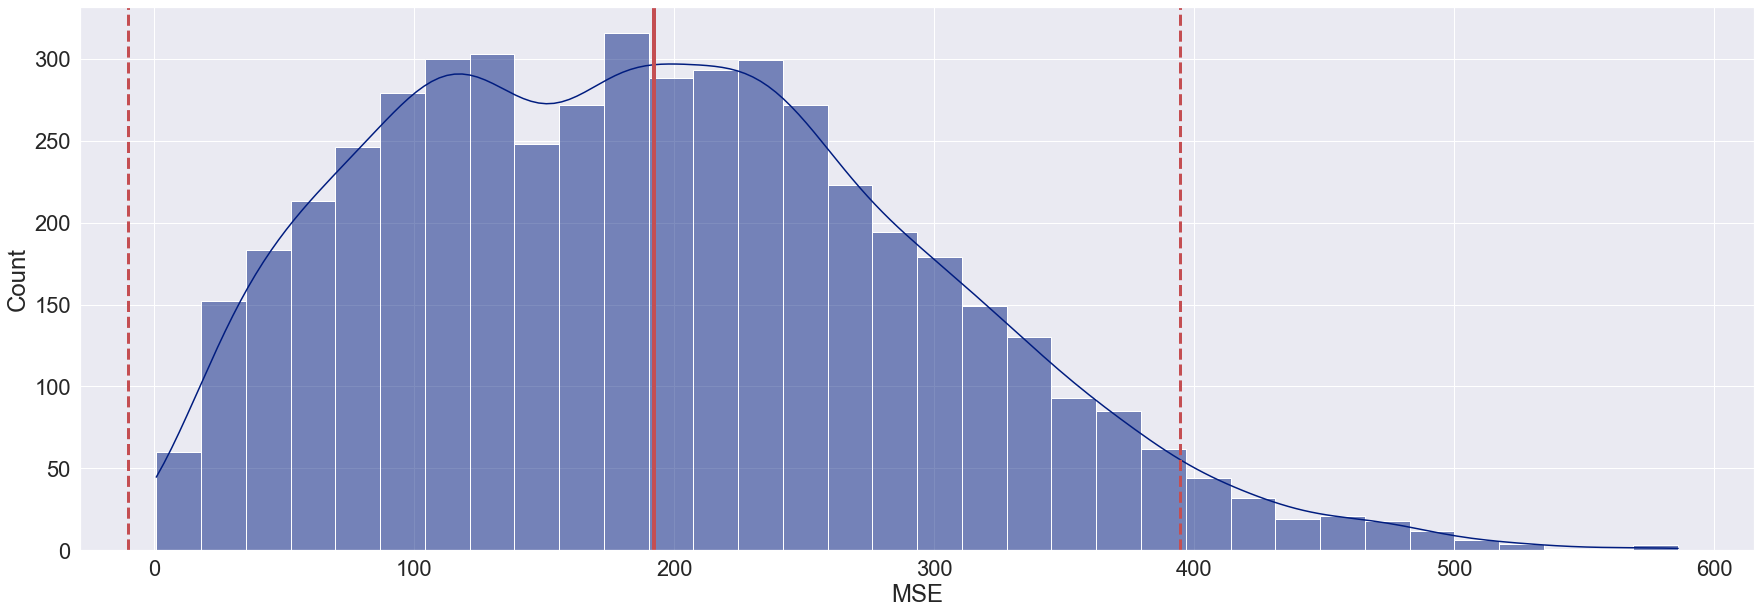

In [58]:
graph=sns.histplot(data=mse,kde=True)
plt.axvline(confidence_int_mse[0], color='r', linestyle='dashed', linewidth=3)
plt.axvline(confidence_int_mse[1], color='r', linestyle='dashed', linewidth=3)
plt.axvline(mean_mse, color='r', linestyle='solid', linewidth=4)
graph.set(xlabel='MSE')
plt.show()

In [59]:
print("R2 Mean: "+str(np.mean(r2)))  
print("Stand Dev: "+str(np.std(r2))+"   -   Confidence interval (95%): "+str(confidence_int_r2[0])+" to "+str(confidence_int_r2[1]))

R2 Mean: 0.5781699664269089
Stand Dev: 0.21176626927217726   -   Confidence interval (95%): 0.16301518808640175 to 0.9933247447674161


In [60]:
print("R2 Mean: "+str(np.mean(mse)))  
print("Stand Dev: "+str(np.std(mse))+"   -   Confidence interval (95%): "+str(confidence_int_mse[0])+" to "+str(confidence_int_mse[1]))

R2 Mean: 192.30141097912917
Stand Dev: 103.19622935257358   -   Confidence interval (95%): -10.008465233402433 to 394.6112871916608


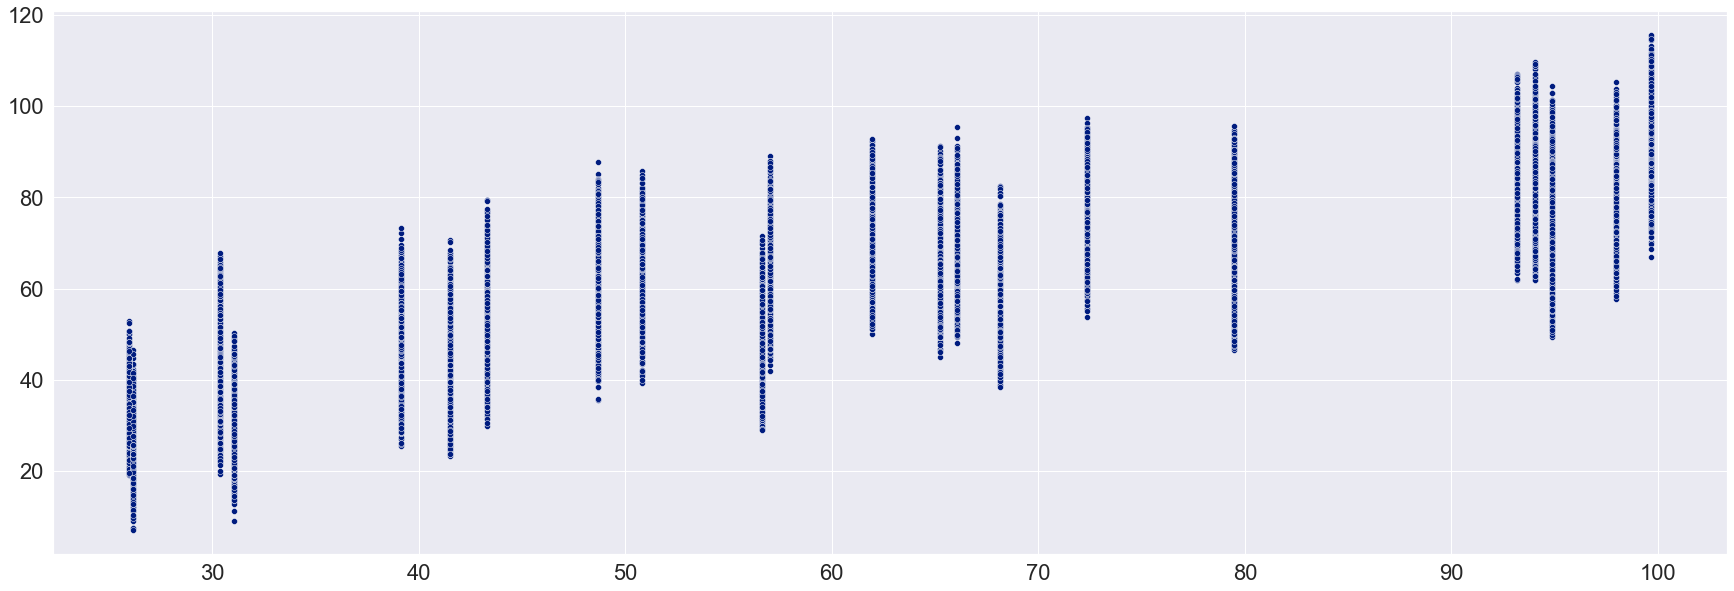

In [62]:
graph=sns.scatterplot(x=ytrain,y=ypred)
plt.show()